### 1 导入相关库

In [1]:
from sklearn import tree                               # 导入tree
from sklearn.datasets import load_wine                 # 导入wine数据集
from sklearn.model_selection import train_test_split   # 导入模型分割函数
import pandas as pd
import itertools

### 2 探索sklearn.datasets中的wine数据

In [2]:
wine = load_wine()

wine.data.shape  # 178行数据，13个特征

wine.target      # 三个特征

pd.concat([pd.DataFrame(wine.data), pd.DataFrame(wine.target)], axis=1)  # 使用pandas合并成一张表的方法

wine.feature_names
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

### 3 分测试集与训练集

In [3]:
xtrain, xtest, ytrain, ytest = train_test_split(wine.data, wine.target, test_size=0.3)

xtrain.shape
xtest.shape

(54, 13)

### 4 建立模型

In [4]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(xtrain, ytrain)
test_score = clf.score(xtest, ytest)   # 返回训练的准确度
train_score = clf.score(xtrain, ytrain)   # 返回训练的准确度
print('Test score is {}, and train score is {}'.format(test_score, train_score))

Test score is 0.8518518518518519, and train score is 1.0


### 5 绘制决策树图

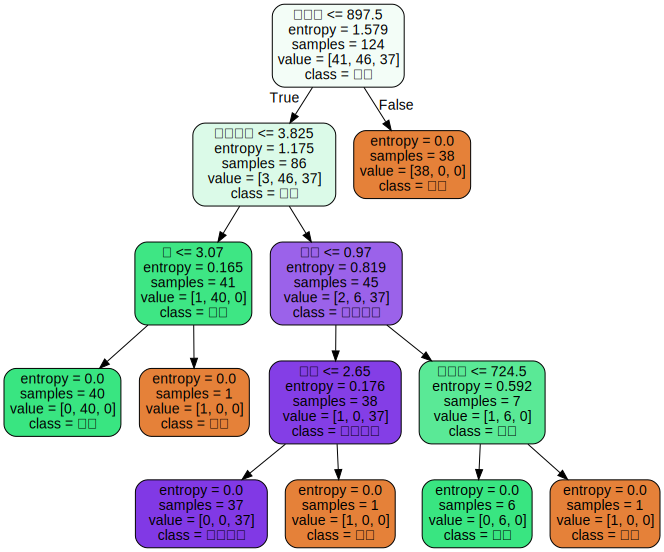

In [5]:
feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']

import graphviz
dot_data = tree.export_graphviz(clf
                            , out_file=None
                            , feature_names= feature_name
                            , class_names= ['琴酒', '雪梨', '贝尔摩德']
                            , filled=True
                            , rounded=True)
graph = graphviz.Source(dot_data)
graph

### 6 探索决策树

In [6]:
# 特征重要性
clf.feature_importances_
[*zip(feature_name, clf.feature_importances_)]

# help(tree.DecisionTreeClassifier())

[('酒精', 0.0),
 ('苹果酸', 0.0),
 ('灰', 0.03463519035900965),
 ('灰的碱性', 0.0),
 ('镁', 0.0),
 ('总酚', 0.034068172722951276),
 ('类黄酮', 0.0),
 ('非黄烷类酚类', 0.0),
 ('花青素', 0.0),
 ('颜色强度', 0.2931867594674766),
 ('色调', 0.13307995298102668),
 ('od280/od315稀释葡萄酒', 0.0),
 ('脯氨酸', 0.5050299244695359)]

### 对决策树进行调优

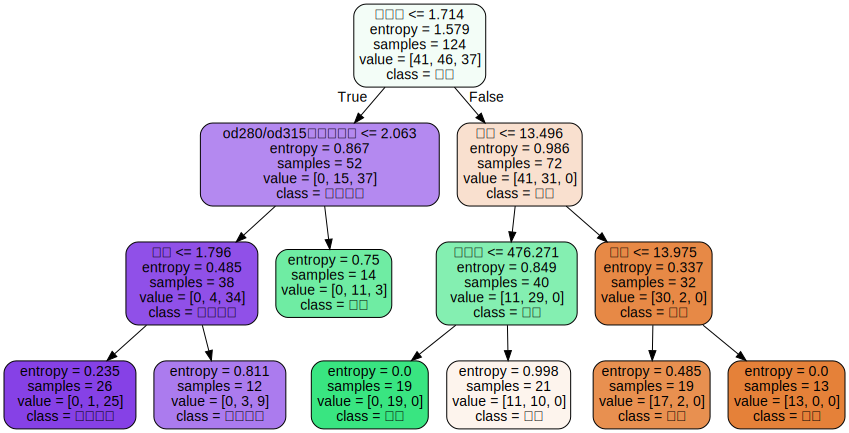

In [9]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy'
                                , random_state=30
                                ,splitter='random'
                                ,max_depth=3
                                ,min_samples_leaf=10
                                ,min_samples_split=10)

clf = clf.fit(xtrain, ytrain)

dot_data = tree.export_graphviz(clf
                            , out_file=None
                            , feature_names= feature_name
                            , class_names= ['琴酒', '雪梨', '贝尔摩德']
                            , filled=True
                            , rounded=True)

graph = graphviz.Source(dot_data)
graph

### 剪枝参数

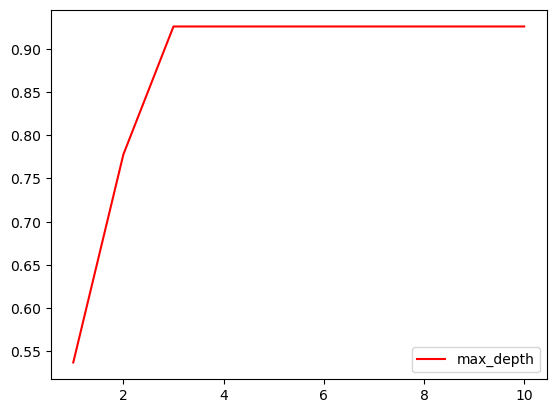

In [14]:
import matplotlib.pyplot as plt

test = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth=i+1
                                        ,criterion='entropy'
                                        ,random_state=30
                                        ,splitter='random')
    clf = clf.fit(xtrain, ytrain)
    score = clf.score(xtest, ytest)
    test.append(score)
plt.plot(range(1,11), test, color='r', label='max_depth')
plt.legend()
plt.show()

In [16]:
clf.predict(xtest)

array([1, 1, 2, 1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 1, 0, 2, 2, 1, 2, 0, 0, 2,
       0, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 2, 2, 1, 0, 2,
       0, 1, 1, 2, 0, 0, 0, 1, 2, 1])